# Just About Right scales and penalty analysis

Just about right (JAR) scales measure the appropriateness of the level of a specific attribute, and are used to determine the optimum levels of attributes in a product.
when JAR data are collected together with Preference data (or liking scores, or hedonic judgements), a penalty analysis can provide directional information for product reformulation or optimization.

In this example, I will analyise a survey where a brand of potato chips has been evaluated by 150 consumers. Each consumer gave his opinion on JAR scale (1 to 5, with 1 being "not enough", 3 being "just about right", and 5 beeing "far too much") for four attributes (Saltiness, Sweetness, Acidity, Crunchiness), and then gave an overall liking score on a 1-10 liking scale.

The dataset can be downloaded from here : https://help.xlstat.com/customer/en/portal/articles/2062259-penalty-analysis-in-excel-tutorial?b_id=9283


In [67]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_table('data1.csv',delimiter = ';')
df.head(10)


,Liking scores,Saltiness,Sweetness,Acidity,Crunchiness
0,8,3,3,4,3
1,3,2,2,4,3
2,3,2,4,2,2
3,7,5,2,3,3
4,4,4,2,5,2
5,7,4,4,4,3
6,7,1,5,2,2
7,8,3,4,2,3
8,4,2,4,5,4
9,8,3,4,4,3


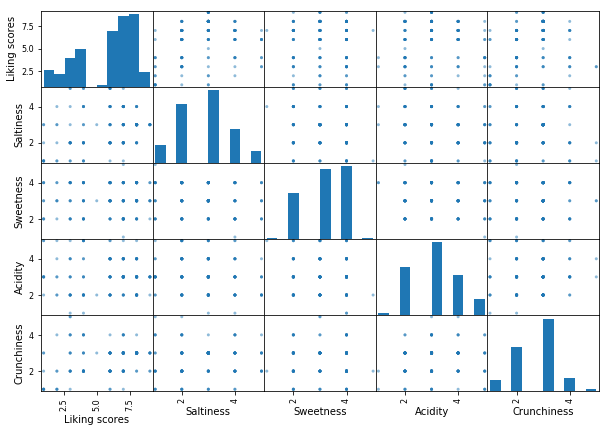

In [68]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10,7))
plt.show()

In [65]:
# attributes don't seem strongly correlated, but some of them could be (eg liking and saltiness).
# let's tests the correlations statistically
from scipy.stats import pearsonr
import pandas as pd

%precision 3
    
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

print('Correlation coefficients\n', df.corr())
print('\n\nCorrelation p values\n',calculate_pvalues(df))

Correlation coefficients
                Liking scores  Saltiness  Sweetness   Acidity  Crunchiness
Liking scores       1.000000   0.278880   0.031848 -0.032440     0.279577
Saltiness           0.278880   1.000000  -0.120257 -0.172605     0.063994
Sweetness           0.031848  -0.120257   1.000000 -0.072346    -0.017548
Acidity            -0.032440  -0.172605  -0.072346  1.000000     0.066288
Crunchiness         0.279577   0.063994  -0.017548  0.066288     1.000000


Correlation p values
               Liking scores Saltiness Sweetness Acidity Crunchiness
Liking scores             0    0.0005    0.6988  0.6935      0.0005
Saltiness            0.0005         0    0.1427  0.0347      0.4366
Sweetness            0.6988    0.1427         0   0.379      0.8312
Acidity              0.6935    0.0347     0.379       0      0.4203
Crunchiness          0.0005    0.4366    0.8312  0.4203           0


In [62]:
# for visualization purposes, make a stacked bar plot
import matplotlib.pyplot as plt

df5 = pd.DataFrame(index = df.columns.values.tolist()[1:], columns = range(1,6))

for attribute in list(df5.index):
    for rating in range(1,6):
        df5.loc[attribute,rating] = df[attribute][df[attribute] == rating].count()

df5.columns = ['very_low', 'low', 'JAR', 'high', 'very_high']
df5


,very_low,low,JAR,high,very_high
Saltiness,14,45,56,26,9
Sweetness,1,36,55,57,1
Acidity,2,40,61,34,13
Crunchiness,12,46,76,14,2


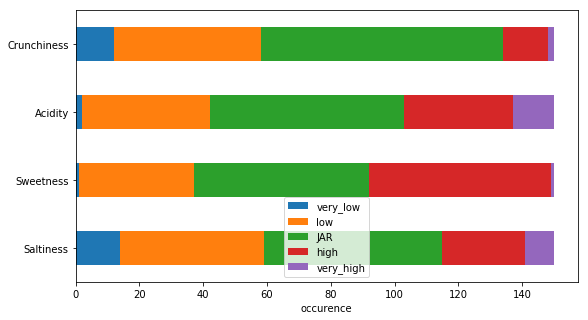

In [61]:
ax = df5.plot(kind='barh', stacked=True, figsize  = (9,5))
ax.set(xlabel="occurence")
plt.show()

                  low       JAR      high
Saltiness    0.393333  0.373333  0.233333
Sweetness    0.246667  0.366667  0.386667
Acidity          0.28  0.406667  0.313333
Crunchiness  0.386667  0.506667  0.106667


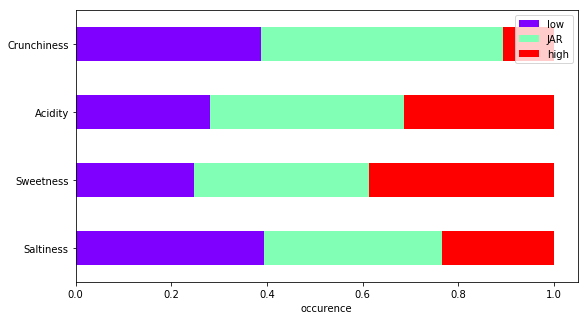

In [8]:
# ternanry plots also seem a powerful visualization tool.

# first, make a new dataset with only low-jar-high categories, so we can project them on a plot with 3 axes
df3 = pd.DataFrame(index = df.columns.values.tolist()[1:], columns = range(3))

for attribute in list(df3.index):
        df3.loc[attribute,0] = df[attribute][df[attribute]  < 3].count() / df[attribute].count()
        df3.loc[attribute,1] = df[attribute][df[attribute] == 3].count() / df[attribute].count()
        df3.loc[attribute,2] = df[attribute][df[attribute]  > 3].count() / df[attribute].count()

df3.columns = ['low', 'JAR', 'high']

from matplotlib import cm
cmap = cm.get_cmap('rainbow') 
ax = df3.plot(kind='barh', stacked=True, figsize  = (9,5), colormap = cmap)  # color = ['blue','green','red'])#, 
ax.set(xlabel="occurence")
plt.show()



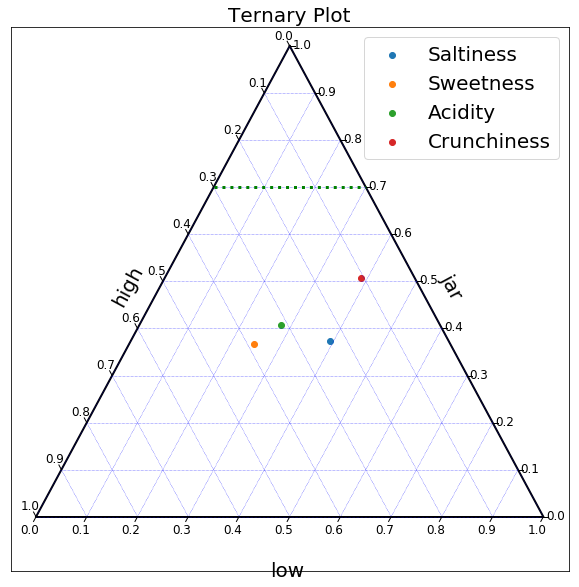

In [18]:
# now let's make a ternary Scatter Plot
# the code for the ternary plot was retrieved from github.com/marcharper/python-ternary

import ternary
from matplotlib.ticker import FormatStrFormatter

scale = 1; fontsize=20
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)
tax.set_title("Ternary Plot", fontsize=20)
tax.boundary(linewidth=2)
tax.gridlines(multiple=.1, color="blue")

points = [tuple(df3.loc[attribute]) for attribute in list(df3.index)]
for i in range(len(points)):
    tax.scatter([points[i]], marker = 'o', label=df3.index[i])
    
tax.line((0,.7,.3), (.3,.7,0), linewidth=3., color='green', linestyle=":")
tax.ticks(axis='lbr', multiple=0.1, fontsize = 12, linewidth = 1, tick_formats="%.1f")
tax.bottom_axis_label("low", fontsize=fontsize)
tax.right_axis_label("jar", fontsize=fontsize)
tax.left_axis_label("high", fontsize=fontsize)
tax.legend(fontsize=fontsize)
tax.clear_matplotlib_ticks()
tax.show()


# Penalty Analysis
Analysis of jar provides a first indication of improvements opportunities for a product.
To move ahead with recommandations for changes, it is important to link attributes and overall liking/acceptability.
Penalty analysis is a method for determining if those respondents who found the product not jar on an attribute rate it overall lower. it can therefore quantify the impact that improving an attribute can have on overall liking.
Penalty analyses are performed separately for each product and one attribute at a time.

Step 1: for every attribute, determine the average overall liking rating (OL)

Step 2: calculate the mean drop in OL when the attribute is rated as too high/low

Step 3: identify attributes with greater potential for improvements (they will have both large occurence in the population and large mean drop)

Step 4: to prioritize choices, these two dimensions can be collapsed into one that accounts for both: the weighted penalty



In [69]:
import numpy as np

# step 1: 
df_pa = pd.DataFrame(columns = ['Attribute', 'Judgement', 'Respondents_ratio', 'Mean_overall_liking', 'Mean_drop', 'Weighted_penalty'])

for attribute in list(df3.index):
    mean_overall_liking = df.loc[df.loc[:, attribute] == 3, 'Liking scores'].mean()
    row_jar = [attribute, 'JAR', df3.loc[attribute,'JAR'], mean_overall_liking, 0, 0]
    row_low = [attribute, 'low', df3.loc[attribute,'low'], df.loc[df.loc[:, attribute] < 3, 'Liking scores'].mean(), 
                mean_overall_liking - df.loc[df.loc[:, attribute] < 3, 'Liking scores'].mean()]
    
    row_low.append(row_low[2] * row_low[4])
    row_high = [attribute, 'high', df3.loc[attribute,'high'], df.loc[df.loc[:, attribute] > 3, 'Liking scores'].mean(), 
                mean_overall_liking - df.loc[df.loc[:, attribute] > 3, 'Liking scores'].mean()]
    row_high.append(row_high[2] * row_high[4])

  
    df_pa.loc[len(df_pa)] = row_jar
    df_pa.loc[len(df_pa)] = row_low
    df_pa.loc[len(df_pa)] = row_high

df_pa

,Attribute,Judgement,Respondents_ratio,Mean_overall_liking,Mean_drop,Weighted_penalty
0,Saltiness,JAR,0.373333,7.017857,0,0
1,Saltiness,low,0.393333,4.830508,2.18735,0.860357
2,Saltiness,high,0.233333,5.828571,1.18929,0.2775
3,Sweetness,JAR,0.366667,6.181818,0,0
4,Sweetness,low,0.246667,5.540541,0.641278,0.158182
5,Sweetness,high,0.386667,5.810345,0.371473,0.143636
6,Acidity,JAR,0.406667,6.311475,0,0
7,Acidity,low,0.280000,5.476190,0.835285,0.23388
8,Acidity,high,0.313333,5.680851,0.630624,0.197596
9,Crunchiness,JAR,0.506667,6.947368,0,0


In [70]:
# sort according to greater weighted penalty so to choose priority
df_pa.sort_values('Weighted_penalty', ascending = False)

# Here, penalty analysis suggests to focus on increasing saltiness and crunchiness, 
# because low ratings on these attributes seem to affect more severly the liking ratings

,Attribute,Judgement,Respondents_ratio,Mean_overall_liking,Mean_drop,Weighted_penalty
1,Saltiness,low,0.393333,4.830508,2.18735,0.860357
10,Crunchiness,low,0.386667,4.810345,2.13702,0.826316
2,Saltiness,high,0.233333,5.828571,1.18929,0.2775
11,Crunchiness,high,0.106667,4.687500,2.25987,0.241053
7,Acidity,low,0.280000,5.476190,0.835285,0.23388
8,Acidity,high,0.313333,5.680851,0.630624,0.197596
4,Sweetness,low,0.246667,5.540541,0.641278,0.158182
5,Sweetness,high,0.386667,5.810345,0.371473,0.143636
0,Saltiness,JAR,0.373333,7.017857,0,0
3,Sweetness,JAR,0.366667,6.181818,0,0


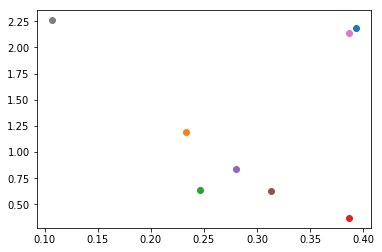

In [78]:
# penalty analysis can be visualized with a graph like this one:
for index, row in df_pa.iterrows():
    if row.Judgement != 'JAR':
        plt.plot(row.Respondents_ratio, row.Mean_drop, marker = 'o')

plt.show()

# make pretty, add grid, labels, text (row.Judgement + ' ' + row.Attribute )
# x_label('%of consumers critizing'), y_label(mean drop in average overall liking (9-point scale))